In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

folder = '/Users/danielferreira/Documents/git/pySETTV/06 - Utility & References/Data'
file = 'player_batting_enriched.csv'
index = 'player_id'
bat = pd.read_csv(folder+'/'+file, index_col=index)
train = bat[bat['year']==2021]
test = bat[bat['year']==2022]
y_train = train['hr_10'].copy()
y_test = test['hr_10'].copy()

def outputs(model):
    """ Quick function to get outputs in one 2x2 list"""
    return [[model.predict(X_train), model.predict(X_test)], [model.predict_proba(X_train)[:,1], model.predict_proba(X_test)[:,1]]]

# Model 1 - Logistic Regression without the variable that contains missing
X_train = train[['ab', 'batting_avg','r_total_stolen_base']].copy()
X_test = test[['ab', 'batting_avg','r_total_stolen_base']].copy()
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1_outputs = outputs(model1)

# Model 2 - KNN
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
model2_outputs = outputs(model2)

# Model 3 - Logistic Regression with missing imputation
X_train = train[['ab','exit_velocity_avg', 'batting_avg','r_total_stolen_base']].copy()
X_train['exit_velocity_avg'] = X_train['exit_velocity_avg'].fillna(X_train['exit_velocity_avg'].median())
X_test = test[['ab','exit_velocity_avg', 'batting_avg','r_total_stolen_base']].copy()
X_test['exit_velocity_avg'] = X_test['exit_velocity_avg'].fillna(X_test['exit_velocity_avg'].median())
model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3_outputs = outputs(model3)

# Model 4 - Decision Tree
model4 = DecisionTreeClassifier(max_depth=3, min_samples_split=30, min_samples_leaf = 20, max_features=3)
model4.fit(X_train, y_train)
model4_outputs = outputs(model4)

# Model 5 - Random Forest
model5 = RandomForestClassifier(random_state=42)
model5.fit(X_train,y_train)
model5_outputs = outputs(model5)

model_dict = {'Logistic Regression No Imp': model1_outputs, 'KNN': model2_outputs, 'Logistic Regression Imp': model3_outputs,
              'Decision Tree': model4_outputs, 'Random Forest': model5_outputs }
y_actual = [y_train, y_test]

In [2]:
import model_comp as mc 
problem = mc.problem("2022 Home Runs", model_dict, y_actual)

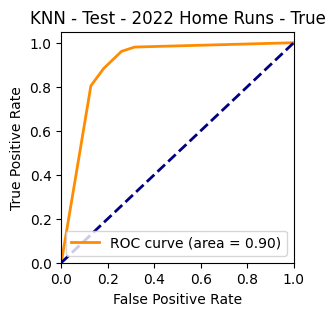

In [5]:
problem.roc_plot('KNN','Test')

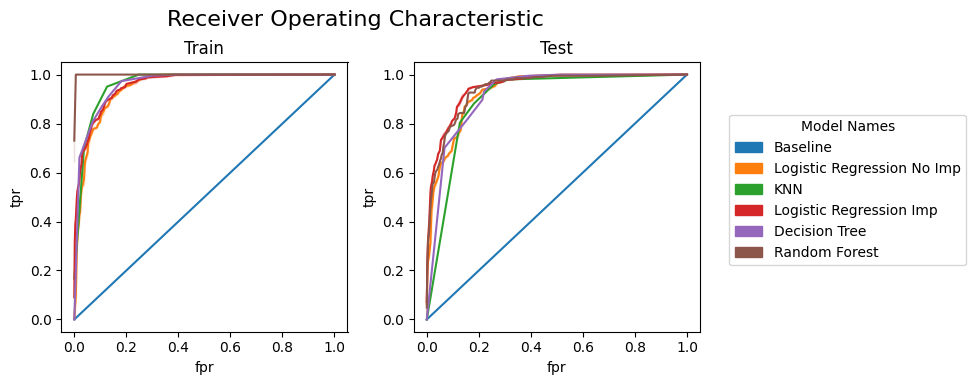

In [4]:
problem.all_roc_plot()